<a href="https://colab.research.google.com/github/VaishnaviDayal7/Netflix-Project/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='purple'> Problem Statement: </font>**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

# **<font color='purple'> Objective: </font>**

The objective of this data analysis is to provide Netflix with actionable insights that will guide their content production and regional growth strategies. The analysis will also focus on determining the most effective content formats, ratings, and local talent to invest in, helping Netflix drive business growth and capture diverse audience segments worldwide.

# **<font color='purple'> Goals: </font>**


*  Goal 1: Data cleaning & Handle missing values
*  Goal 2: Identify the most popular genres and formats (movies vs. TV shows)
* Goal 3 Analyze content consumption patterns in different countries
* Goal 4: Assess how different content ratings (e.g., TV-MA, PG-13) perform in terms of viewership
* Goal 5: Determine the peak times of the year, month and week for content consumption and identify trends in content additions.
* Goal 6: Analyze the impact of local actors and directors on content performance
* Goal 7: Analyze audience engagement in relation to content length (movies vs. TV show seasons)
* Goal 8: Understand which genres perform well across multiple regions and identify opportunities for cross-market promotions.



---



---







# **Downloading the Dataset**

In [ ]:
#first, we import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read the entire data and store it in a variabe
data = pd.read_csv('netflix_titles.csv')

data.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Data Exploration & Missing Data Handling**

In [ ]:
data.shape #dataset has 8807 rows and 12 columns

(8807, 12)

In [ ]:
data.info() #dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data['release_year'].describe() #release year 5 point summary

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **Observations:**

1. Our data has 8807 rows and 12 columns
2. We can observe that show_id, type, title, release_year, listed_in and description does not contain a single null value
3. All columns are object except release year which is an integer
4. 'cast' column has nested actor names
5. Movies and TV Shows release date lies between years 1925 to 2021.
6. The type column can be converted into categorical type since it has 'Movies' & 'Shows'only.


Handle Null Values:

In [ ]:
data['director'] = data['director'].fillna('Unknown') #filled NaN in director column with 'Unknown'
data['cast'] = data['cast'].fillna('Unknown') #filled NaN in cast column with 'Unknown'
data['country'] = data['country'].fillna('Unknown') #filled NaN in country column with 'Unknown'
data['date_added'] = data['date_added'].fillna('Unknown') #filled NaN in dat added column with 'Unknown'
data['rating'] = data['rating'].fillna('Unknown') #filled NaN in rating column with 'Unknown'
data['duration'] = data['duration'].fillna('0 min') #filled NaN in director column with '0 min' since we will be extracting the integer in future

In [ ]:
data.info() #information after processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Unnesting Columns

In [ ]:
data_new = data.copy()
data_new['cast']= data_new['cast'].str.split(',')
data_new = data_new.explode('cast')
data_new['listed_in']= data_new['listed_in'].str.split(',')
data_new = data_new.explode('listed_in')
data_new['director']= data_new['director'].str.split(',')
data_new = data_new.explode('director')
data_new['country']= data_new['country'].str.split(',')
data_new = data_new.explode('country')
data_new.reset_index(drop=True,inplace=True)
data_new.shape

(202065, 12)

Note: I have created a deep copy for unnesting the actor column because it could inflate the number of rows based on number of actors and give us inaccurate results when we want to show/movie level analysis. 'data_new' represents granular view which will be helpful to perform analysis on individual elements within the unnested column (e.g., individual actors)

**Categorical Analysis**

# **Distribution of Movies & TV Shows**

In [ ]:
#Non graphical analysis
a = data.groupby('type')['show_id'].count().reset_index()
a

,type,show_id
0,Movie,6131
1,TV Show,2676


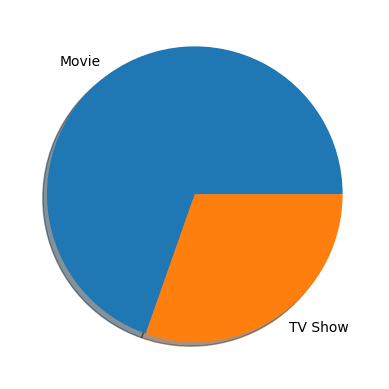

In [ ]:
#graphical analysis
a = data.groupby('type')['show_id'].count().reset_index()
plt.pie(a['show_id'],labels=a['type'],shadow=True)
plt.show()

# **Insights**:

Netflix platform has more movies than TV shows

---



# **Count of Movies & Shows Released in Years**

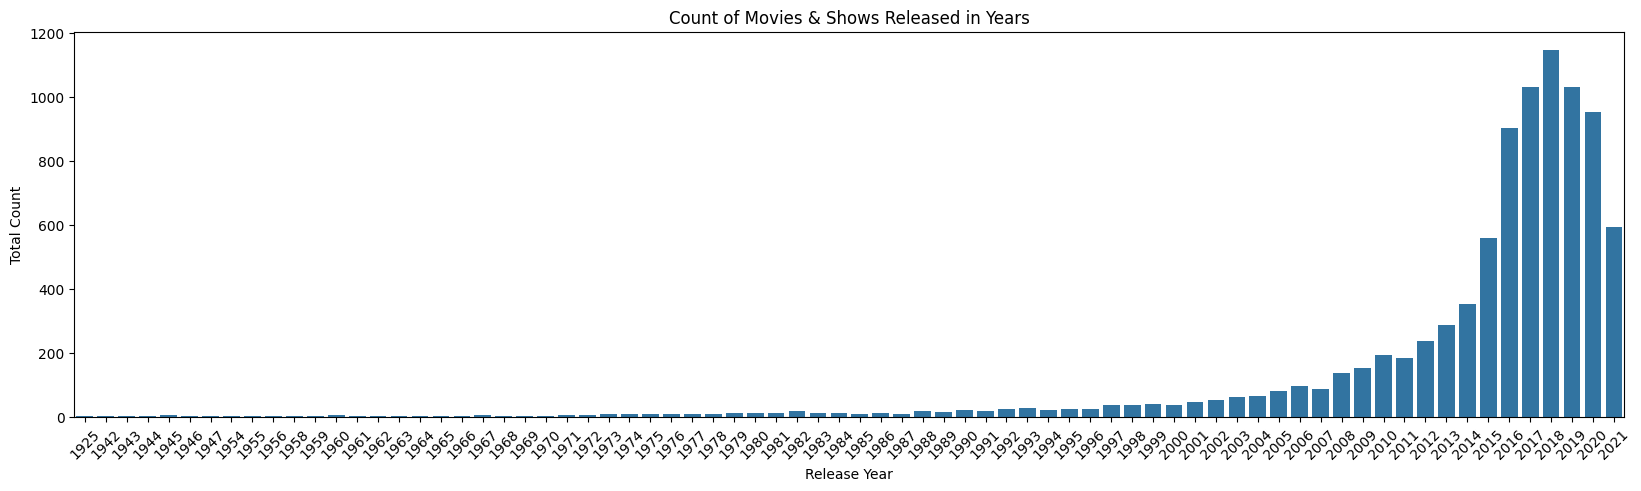

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=data, x='release_year')
plt.xlabel('Release Year')
plt.ylabel('Total Count')
plt.title('Count of Movies & Shows Released in Years')
plt.xticks(rotation=45)
plt.show()

# **Insights:**

- Starting from around 2005, there is a noticeable surge in content production, which rapidly increases each year, peaking between 2015-2018. This likely reflects the rise of digital platforms, streaming services, and an increase in global production.

- The highest volume of releases occurs around 2018, suggesting this was a boom year for content creation, possibly driven by a combination of factors like advancements in production technology and a greater demand for content due to the rise of streaming.

- Post-2019, there is a slight decline, possibly attributed to the global slowdown caused by the COVID-19 pandemic, which affected production schedules across the world.



---



In [ ]:
#non graphical analysis
d = data.groupby('rating')['show_id'].count().sort_values(ascending=False).head(10).reset_index()
d

,rating,show_id
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


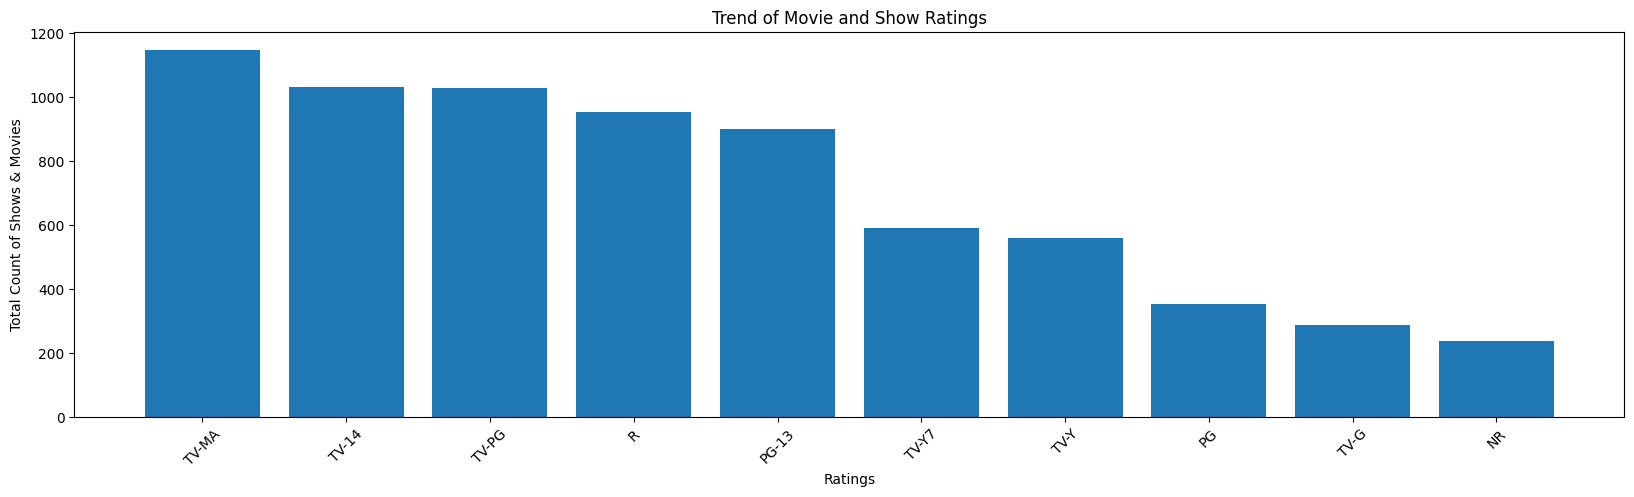

In [ ]:
#graphical analysis
d = data.groupby('rating')['show_id'].count().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(20,5))
plt.bar(d['rating'],b['show_id'])
plt.xlabel('Ratings')
plt.ylabel('Total Count of Shows & Movies')
plt.title('Trend of Movie and Show Ratings')
plt.xticks(rotation=45)
plt.show()

# **Observation:**
1. TV-MA (Mature Audiences Only) is the most frequent rating, with 3,207 entries, making up a large portion of the content. This indicates a significant amount of the content in the dataset is intended for adult viewers

2. R-rated (Restricted) content, which also contains adult themes, accounts for 799 entries. Together, these ratings highlight a strong emphasis on adult content.

---



# **Most Popular Genres (bar graph)**

In [ ]:
#non graphical analysis
t = data_new.groupby(['listed_in'])['title'].count().sort_values(ascending=False).reset_index()
t.head(10)

,listed_in,title
0,dramas,29806
1,international movies,28243
2,comedies,20829
3,international tv shows,12845
4,action & adventure,12216
5,independent movies,9834
6,children & family movies,9771
7,tv dramas,8942
8,thrillers,7107
9,romantic movies,6412


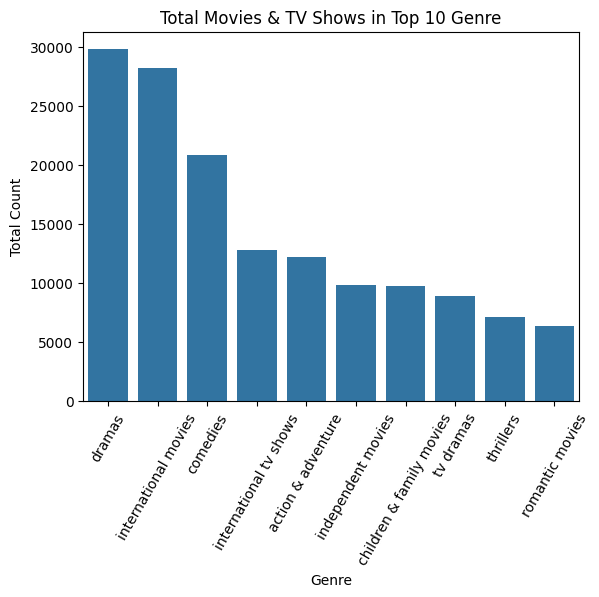

In [ ]:
#graphical analysis
p = t.head(10)

sns.barplot(data=p,x='listed_in',y='title')
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.title('Total Movies & TV Shows in Top 10 Genre')
plt.xticks(rotation=60)
plt.show()

# **Word Cloud Of Most Popular Genres**

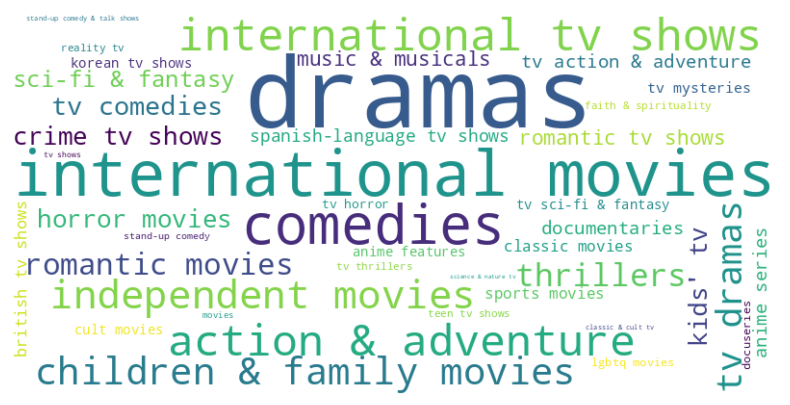

In [ ]:
from wordcloud import WordCloud

word_freq = dict(zip(t['listed_in'], t['title']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.show()

# **Insights:**

1. **Dramas Dominate:** Dramas are the most prevalent category on Netflix, which suggests that this genre has a broad appeal or high content production rate.

2. **International Movies and TV Shows:** There is a substantial number of international movies and TV shows, indicating a diverse global audience and Netflix's investment in non-English content.

3. **Comedies are Popular:** Comedies follow closely after dramas, suggesting that light-hearted content has significant demand as well.

# **Recommendations:**

**Increase Romantic Movies and Thrillers:** As these genres have fewer titles, Netflix could potentially meet a latent demand by increasing content in these areas. By promoting romantic and thriller movies, Netflix could cater to underserved audiences.


**Focus on Diverse Formats and Regions:** With international content already significant, Netflix could further explore niche markets and specific regional genres to attract more global subscribers.



---



# **Most Liked Directors & Actors**

In [ ]:
#non graphical analysis
data_new['director'] = data_new['director'].str.strip().str.lower()
director_data = data_new.loc[data_new['director']!='unknown']
director_data = director_data.groupby(['director'])['title'].nunique().sort_values(ascending=False)
director_data = director_data.reset_index().head(10)

director_data

,director,title
0,rajiv chilaka,22
1,jan suter,21
2,raúl campos,19
3,marcus raboy,16
4,suhas kadav,16
5,jay karas,15
6,cathy garcia-molina,13
7,martin scorsese,12
8,jay chapman,12
9,youssef chahine,12


In [ ]:
#non graphical analysis

data_new['cast'] = data_new['cast'].str.strip().str.lower()
cast_data = data_new.loc[data_new['cast']!='unknown']
cast_data = cast_data.groupby(['cast'])['title'].nunique().sort_values(ascending=False)
cast_data = cast_data.reset_index().head(10)

cast_data

,cast,title
0,anupam kher,43
1,shah rukh khan,35
2,julie tejwani,33
3,takahiro sakurai,32
4,naseeruddin shah,32
5,rupa bhimani,31
6,akshay kumar,30
7,om puri,30
8,yuki kaji,29
9,amitabh bachchan,28


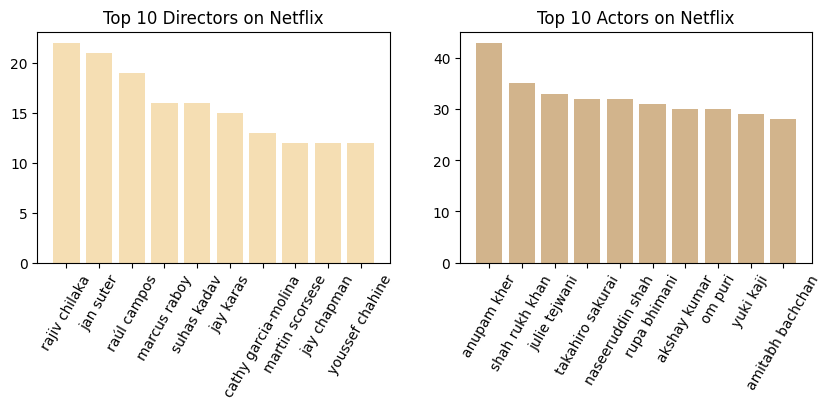

In [ ]:
#graphical analysis
data_new['director'] = data_new['director'].str.strip().str.lower()
director_data = data_new.loc[data_new['director']!='unknown']
director_data = director_data.groupby(['director'])['title'].nunique().sort_values(ascending=False)
director_data = director_data.reset_index().head(10)

data_new['cast'] = data_new['cast'].str.strip().str.lower()
cast_data = data_new.loc[data_new['cast']!='unknown']
cast_data = cast_data.groupby(['cast'])['title'].nunique().sort_values(ascending=False)
cast_data = cast_data.reset_index().head(10)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(director_data['director'],director_data['title'],color='wheat')
plt.xticks(rotation=60)
plt.title('Top 10 Directors on Netflix')
plt.subplot(1,2,2)
plt.bar(cast_data['cast'],cast_data['title'],color='tan')
plt.xticks(rotation=60)
plt.title('Top 10 Actors on Netflix')
plt.show()

# **Insights:**

**Directors:**
- Rajiv Chilaka and Jan Suter lead with over 20 titles, indicating their prolific contribution to Netflix’s content.

- The directors list includes a mix of filmmakers from different regions, reflecting Netflix’s global reach.

- There’s a steep decline after the top two directors, with the rest having around 15-10 titles each.

- Directors like Martin Scorsese and Jay Chapman are internationally renowned, hinting at Netflix’s blend of both mainstream and regional content.

**Actors:**
- Anupam Kher is the clear leader with over 40 appearances, followed by Shah Rukh Khan and Hrithik Roshan with over 30 appearances each.

- The chart predominantly features Indian actors, which suggests a strong presence of Indian cinema or content on Netflix.

- There’s a balance between veteran actors (e.g., Amitabh Bachchan, Om Puri) and contemporary stars (e.g., Hrithik Roshan, Shah Rukh Khan).

- Notable international actors like Takayuki Sakurai (likely a Japanese actor) showcase the platform's reach beyond Bollywood.


# **Recommendations:**

- The dominance of Indian actors and directors shows a strong consumption of Indian content. Netflix should continue investing in this region but also explore other regional markets, like South America and Africa, to diversify its audience.

- The heavy skew towards Indian stars suggests a massive audience from that region. Expanding this with local-language promotions and dubbing options could attract even more viewers.



---



# **Best Genres in TV shows & Movies**

In [ ]:
#divided the data based on movie and tv show category
movie = data_new.loc[(data_new['type']=='Movie')].copy()
tv_show = data_new.loc[(data_new['type']=='TV Show')].copy()

In [ ]:
#non graphical analysis
data_new['listed_in'] = data_new['listed_in'].str.strip().str.lower() #removed duplicates and made the entries consistent
e = movie.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10).reset_index()
e

,listed_in,title
0,international movies,2752
1,dramas,2427
2,comedies,1674
3,documentaries,869
4,action & adventure,859
5,independent movies,756
6,children & family movies,641
7,romantic movies,616
8,thrillers,577
9,music & musicals,375


In [ ]:
e1 = tv_show.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10).reset_index()
e1

,listed_in,title
0,international tv shows,1351
1,tv dramas,763
2,tv comedies,581
3,crime tv shows,470
4,kids' tv,451
5,docuseries,395
6,romantic tv shows,370
7,reality tv,255
8,british tv shows,253
9,anime series,176


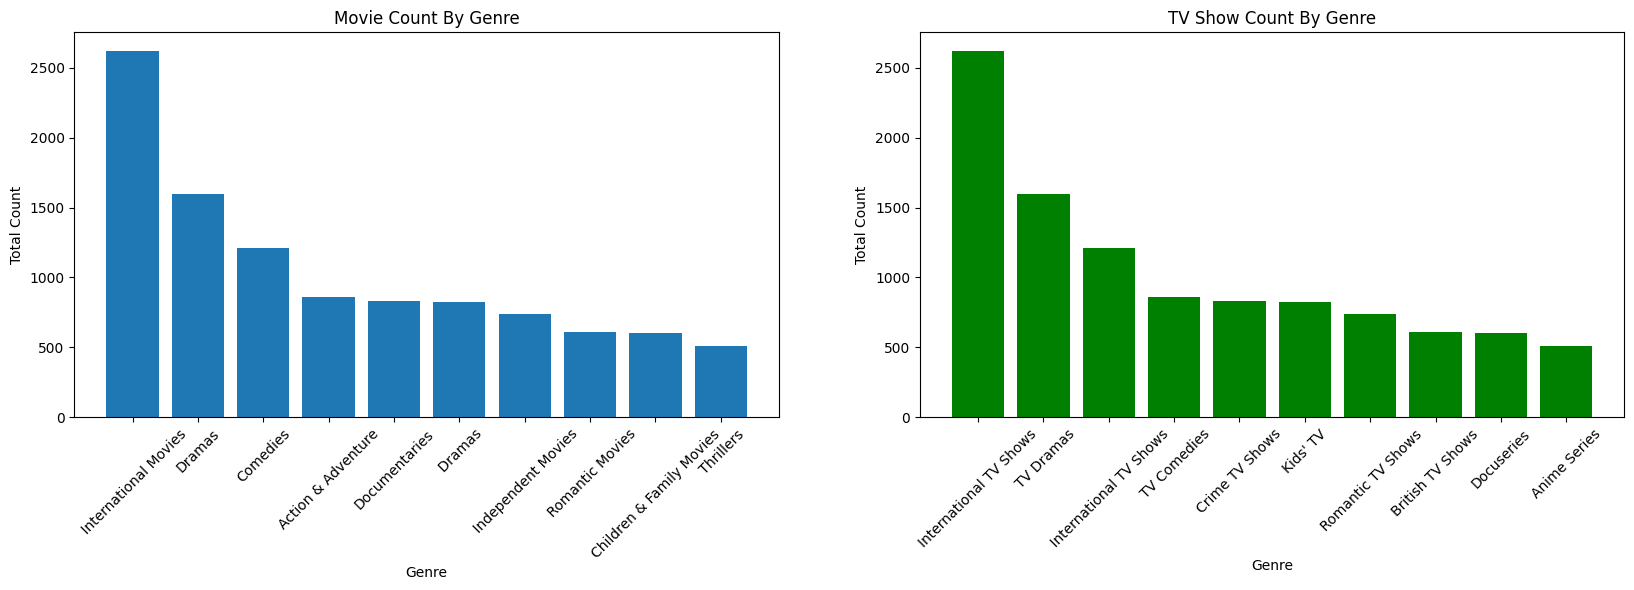

In [ ]:
#graphical analysis
data_new['listed_in'] = data_new['listed_in'].str.strip().str.lower() #removed duplicates and made the entries consistent
e = movie.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10).reset_index()
e1 = tv_show.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(e['listed_in'],e['title'])
plt.xticks(rotation=45)
plt.title('Movie Count By Genre')
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.subplot(1,2,2)
plt.bar(e1['listed_in'],e['title'],color='green')
plt.xticks(rotation=45)
plt.title('TV Show Count By Genre')
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.show()

# **Insights:**

- International Movies dominate with over 2,500 titles, significantly outpacing other genres. This highlights Netflix’s global content offering and its effort to cater to international audiences.

- Dramas and Comedies also have substantial representation, making them popular categories for movies on Netflix. Dramas are close to 1,500 in count, while Comedies are slightly above 1,000.

- International TV Shows lead by a large margin, with over 2,500 titles, similar to the movie category. This reflects Netflix's strategy of heavily promoting non-English and international TV content, which likely appeals to a global audience.

- TV Dramas are the second-highest genre, showing a preference for long-form, narrative-driven content among TV show viewers.

# **Recommendations:**

By continuing to invest in international content, expanding underrepresented genres, and leveraging its existing popular categories, Netflix can further grow its user base and maintain its lead in the streaming industry. The company should prioritize family-oriented content, niche genres like anime, and region-specific promotions to capitalize on untapped market segments.



---



# **Top 10 Content Consuming Countries**

In [ ]:
#non graphical analysis
f = movie.groupby(['country'])['title'].nunique().sort_values(ascending=False).head(10).reset_index()
f


,country,title
0,united states,2752
1,india,962
2,united kingdom,534
3,unknown,440
4,canada,319
5,france,303
6,germany,182
7,spain,171
8,japan,119
9,china,114


In [ ]:
f1 = tv_show.groupby(['country'])['title'].nunique().sort_values(ascending=False).head(10).reset_index()
f1

,country,title
0,united states,938
1,unknown,391
2,united kingdom,272
3,japan,199
4,south korea,170
5,canada,126
6,france,90
7,india,84
8,taiwan,70
9,australia,66


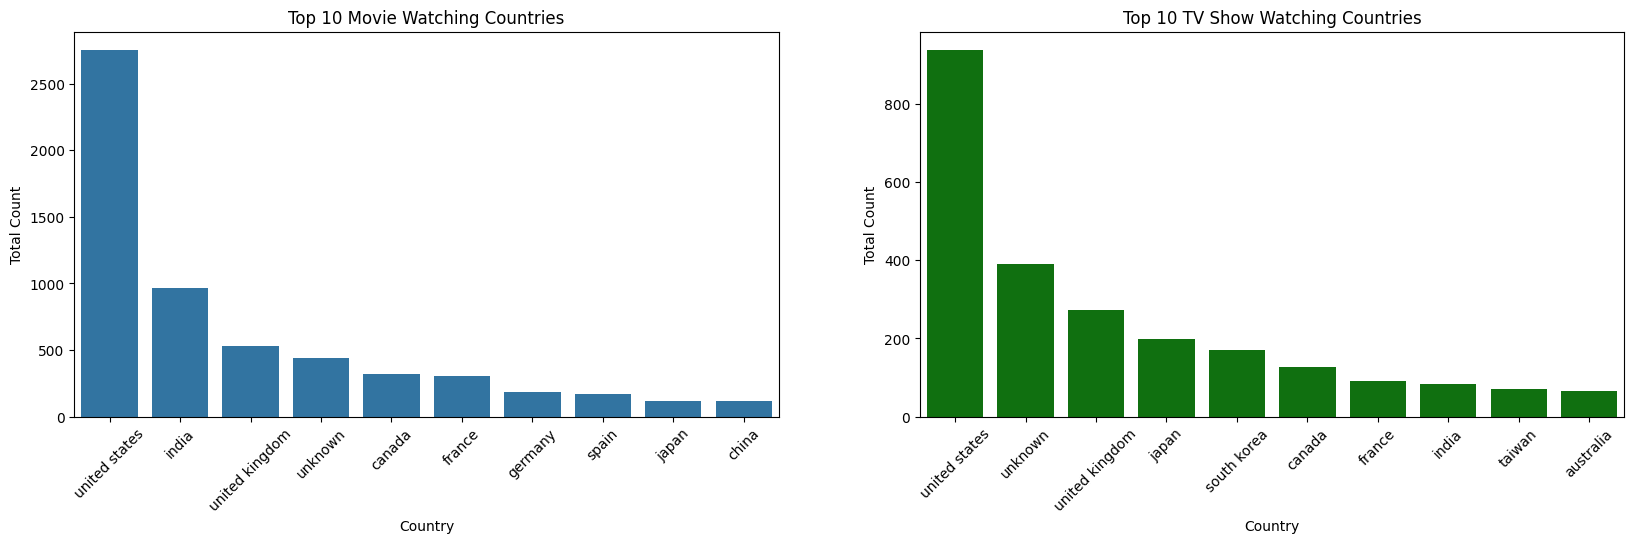

In [ ]:
#graphical analysis
data_new['country'] = data_new['country'].str.strip().str.lower()
f2 = data_new.groupby(['country','type'])['title'].nunique().sort_values(ascending=False).head(10).reset_index()
f = movie.groupby(['country','type'])['title'].nunique().sort_values(ascending=False).head(10).reset_index()
f1 = tv_show.groupby(['country','type'])['title'].nunique().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=f,x='country',y='title')
plt.xticks(rotation=45)
plt.title('Top 10 Movie Watching Countries')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.subplot(1,2,2)
sns.barplot(data=f1,x='country',y='title',color='green')
plt.xticks(rotation=45)
plt.title('Top 10 TV Show Watching Countries')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.show()


# **Insights:**

- United States is the dominant movie-watching country, with over 2000 counts, significantly higher than any other country.

- India follows with around half the count of the U.S., indicating a strong interest in movies but still far behind.

- The United States also leads in TV show consumption but with a much smaller margin compared to movie watching, suggesting a more balanced global consumption of TV shows.

- There’s a significant proportion of users labeled as "Unknown", showing the potential for a large portion of unidentified viewers.

- United Kingdom, Japan, and South Korea are also prominent in TV show watching, with Asia (Japan and South Korea) showing a considerable interest.

# **Recommendations:**

- The U.S. and India are dominant in both movies and TV shows, with India being more movie-centric. Netflix should continue to invest heavily in region-specific content, particularly for Bollywood and Hollywood films, which resonate with these audiences.

- There’s a large "Unknown" category in both charts. Netflix should work on enhancing location-tracking or user-profile completeness to better understand these regions. This could lead to better-targeted content and marketing campaigns.

- Given that non-U.S. countries like Japan and South Korea are significant TV watchers, Netflix could increase local-language TV shows in these countries, especially in genres like drama and anime, which are already popular.

- The stark difference in India’s preference for movies over TV shows suggests Netflix should emphasize more movie-related content, potentially offering exclusive Bollywood releases to capture more of the market share.



---



# **Top 10 Movie Directors & Actors**

In [ ]:
#non graphical analysis
mdirector_data = movie.loc[(movie['director']!='unknown')]

mdirector_data = mdirector_data.groupby(['director'])['title'].nunique().sort_values(ascending=False)
mdirector_data = mdirector_data.reset_index().head(10)

mdirector_data

,director,title
0,rajiv chilaka,22
1,jan suter,21
2,raúl campos,19
3,suhas kadav,16
4,jay karas,15
5,marcus raboy,15
6,cathy garcia-molina,13
7,martin scorsese,12
8,youssef chahine,12
9,jay chapman,12


In [ ]:
mcast_data = movie.loc[data_new['cast']!='unknown']
mcast_data = mcast_data.groupby(['cast'])['title'].nunique().sort_values(ascending=False)
mcast_data = mcast_data.reset_index().head(10)

mcast_data

,cast,title
0,anupam kher,42
1,shah rukh khan,35
2,naseeruddin shah,32
3,akshay kumar,30
4,om puri,30
5,amitabh bachchan,28
6,paresh rawal,28
7,julie tejwani,28
8,rupa bhimani,27
9,boman irani,27


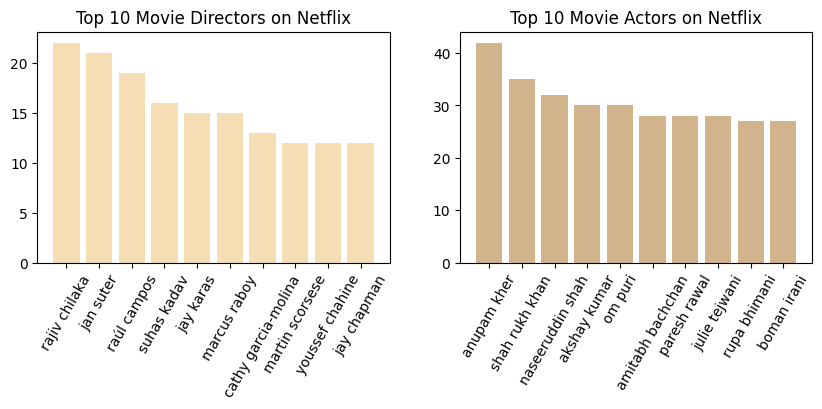

In [ ]:
#graphical analysis
mdirector_data = movie.loc[(movie['director']!='unknown')]
mdirector_data = mdirector_data.groupby(['director'])['title'].nunique().sort_values(ascending=False)
mdirector_data = mdirector_data.reset_index().head(10)

mcast_data = movie.loc[data_new['cast']!='unknown']
mcast_data = mcast_data.groupby(['cast'])['title'].nunique().sort_values(ascending=False)
mcast_data = mcast_data.reset_index().head(10)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(mdirector_data['director'],mdirector_data['title'],color='wheat')
plt.xticks(rotation=60)
plt.title('Top 10 Movie Directors on Netflix')
plt.subplot(1,2,2)
plt.bar(mcast_data['cast'],mcast_data['title'],color='tan')
plt.xticks(rotation=60)
plt.title('Top 10 Movie Actors on Netflix')
plt.show()


# **Insights:**

**Movies:**
- Rajiv Chilaka leads the list, with over 20 movies directed, indicating significant contribution to Netflix's content.

- Jan Suter and Raúl Campos follow closely behind, with similar numbers of movies (around 18 to 19), suggesting a major presence in the platform's movie collection.

- Directors such as Suhas Kadav and Jay Karas have contributed about 15 movies each, while Martin Scorsese and Youssef Chahine, though globally renowned, appear in the lower half of the top 10 list on Netflix, with around 12 films.

- There is a mix of both global and regional directors, with some well-known for their contributions to specific genres or regions (e.g., Martin Scorsese for Western audiences, Rajiv Chilaka for Indian animation).

**TV Shows:**

- Anupam Kher dominates the actor list, featuring in over 40 movies, reflecting his prolific career, particularly in Indian cinema.

- Shah Rukh Khan, another huge name in the Indian film industry, ranks second with around 35 films.

- Other Indian actors like Naseeruddin Shah, Akshay Kumar, and Amitabh Bachchan also feature prominently, emphasizing Netflix’s extensive Indian movie catalog.

- A notable trend is that most of the actors on this list are from Bollywood, underscoring Netflix's strategy of catering heavily to the Indian market.

- Female actors such as Jui Tevani and Rupa Bhimani have relatively high appearances, although not as many as their male counterparts.

# **Recommendation:**

- The dominance of Indian actors and directors suggests that the platform's content strategy heavily focuses on India. Netflix should continue to invest in local production, including regional content in different Indian languages, as this could further boost engagement in this region.

- Given that directors like Rajiv Chilaka and Jan Suter are leading the chart, Netflix could create a special promotional series focusing on prolific regional creators to attract more viewers to their extensive catalogs.

- The male-dominated list suggests an opportunity to further promote movies with prominent female leads. Netflix could focus on acquiring and promoting more content led by female directors and actors to balance gender representation.

- With actors like Anupam Kher and Shah Rukh Khan having an extensive presence on Netflix, the platform could create actor-based collections or playlists that showcase their work, helping fans easily discover content from their favorite stars.



---



# **Top 10 TV Show Directors & Actors**

In [ ]:
#non graphical analysis
tdirector_data = tv_show.loc[(tv_show['director']!='unknown')]
tdirector_data = tdirector_data.groupby(['director'])['title'].nunique().sort_values(ascending=False)
tdirector_data = tdirector_data.reset_index().head(10)

tdirector_data

,director,title
0,ken burns,3
1,alastair fothergill,3
2,stan lathan,2
3,jung-ah im,2
4,joe berlinger,2
5,hsu fu-chun,2
6,gautham vasudev menon,2
7,lynn novick,2
8,iginio straffi,2
9,shin won-ho,2


In [ ]:
tcast_data = tv_show.loc[tv_show['cast']!='unknown']
tcast_data = tcast_data.groupby(['cast'])['title'].nunique().sort_values(ascending=False)
tcast_data = tcast_data.reset_index().head(10)
tcast_data

,cast,title
0,takahiro sakurai,25
1,yuki kaji,19
2,junichi suwabe,17
3,ai kayano,17
4,daisuke ono,17
5,yuichi nakamura,16
6,jun fukuyama,15
7,yoshimasa hosoya,15
8,david attenborough,14
9,mamoru miyano,13


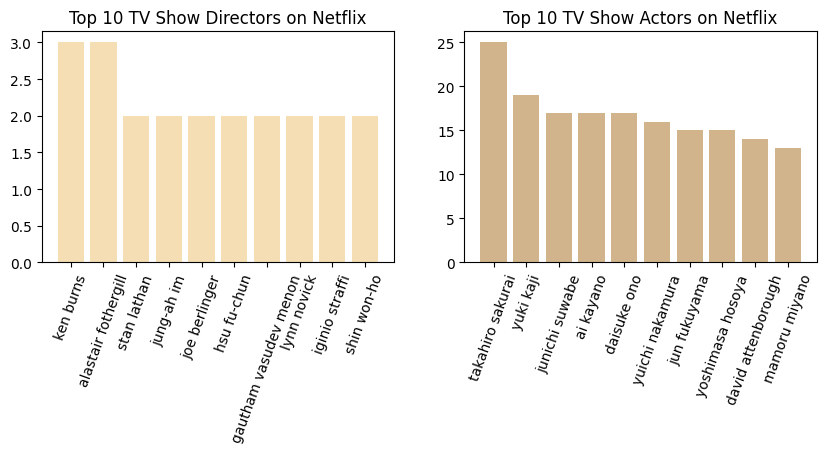

In [ ]:
#graphical analysis
tdirector_data = tv_show.loc[(tv_show['director']!='unknown')]
tdirector_data = tdirector_data.groupby(['director'])['title'].nunique().sort_values(ascending=False)
tdirector_data = tdirector_data.reset_index().head(10)

tcast_data = tv_show.loc[tv_show['cast']!='unknown']
tcast_data = tcast_data.groupby(['cast'])['title'].nunique().sort_values(ascending=False)
tcast_data = tcast_data.reset_index().head(10)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(tdirector_data['director'],tdirector_data['title'],color='wheat')
plt.xticks(rotation=70)
plt.title('Top 10 TV Show Directors on Netflix')
plt.subplot(1,2,2)
plt.bar(tcast_data['cast'],tcast_data['title'],color='tan')
plt.xticks(rotation=70)
plt.title('Top 10 TV Show Actors on Netflix')
plt.show()


# **Insights:**

**Top 10 TV Show Directors on Netflix:**

- Ken Burns and Alastair Fothergill lead the list with around 3 TV shows each, suggesting that documentary and nature show directors have a prominent presence on Netflix.

- Shana Hagan and Jung-ah Im, along with several others like Joe Berlinger and Hsu Fu-Chun, have directed around 2 shows each, indicating a variety of directors with relatively smaller numbers of shows.

- The diversity of names implies that Netflix's TV content involves directors from different regions and genres, likely reflecting a global content strategy.

- Directors such as Shin Won-ho, known for Korean dramas, and Iginio Straffi, associated with animated shows, highlight Netflix’s investment in international and diverse genres.

**Top 10 TV Show Actors on Netflix:**

- Takashi Sakurai leads the actors' list with over 25 TV show appearances, followed by Yuki Kaji and Junichi Suwabe with similar numbers, pointing to the heavy representation of Japanese voice actors.

- Several other names such as Daisuke Ono, Yuichi Nakamura, and Mamoru Miyano suggest that Netflix has a strong focus on anime content, as many of these actors are well-known for their roles in anime.

- David Attenborough is a notable non-Japanese entry, known for his narrations in wildlife documentaries, showing Netflix's investment in documentary content as well.

- Most actors on this list appear to be voice actors, indicating a significant contribution of animated content, particularly anime, to Netflix’s TV show catalog.

# **Recommendations:**

- The strong representation of Japanese voice actors, as well as directors like Iginio Straffi, suggests that animated content, particularly anime, is a major draw on Netflix. Netflix should continue to invest in and acquire anime series to appeal to the growing global anime fanbase.

- With directors like Ken Burns, Alastair Fothergill, and actors like David Attenborough leading in their respective categories, Netflix can focus more on promoting documentary and nature series, which seem to have a strong viewer base. The platform could create curated collections or campaigns to attract more subscribers to this genre.



---




## **Movies vs TV Shows YoY Analysis**

In [ ]:
#convert object to datetime format
data_new['date_added'] = pd.to_datetime(data_new['date_added'], errors='coerce')

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt

movie = data_new.loc[(data_new['type']=='Movie')].copy()
tv_show= data_new.loc[(data_new['type']=='TV Show')].copy()

In [ ]:
#extracted year from datetime for both datasets
movie['year_added'] = movie['date_added'].dt.year
tv_show['year_added'] = tv_show['date_added'].dt.year

In [ ]:
#non graphical analysis
movie_by_year = movie.groupby('year_added')['title'].nunique().reset_index()
tvshow_by_year = tv_show.groupby('year_added')['title'].nunique().reset_index()

In [ ]:
movie_by_year

,year_added,title
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,56
8,2016,253
9,2017,839


In [ ]:
tvshow_by_year

,year_added,title
0,2008.0,1
1,2013.0,4
2,2014.0,4
3,2015.0,17
4,2016.0,165
5,2017.0,325
6,2018.0,388
7,2019.0,575
8,2020.0,594
9,2021.0,505


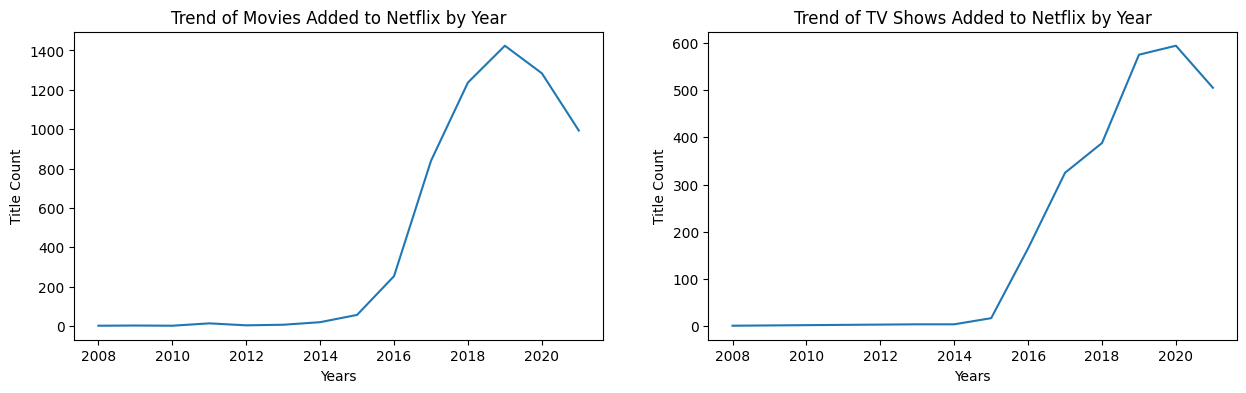

In [ ]:
#graphical analysis
movie_by_year = movie.groupby('year_added')['title'].nunique().reset_index()
tvshow_by_year = tv_show.groupby('year_added')['title'].nunique().reset_index()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(data = movie_by_year, y='title',x='year_added')
plt.title('Trend of Movies Added to Netflix by Year')
plt.xlabel('Years')
plt.ylabel('Title Count')
plt.subplot(1,2,2)
sns.lineplot(data = tvshow_by_year, y='title',x='year_added')
plt.title('Trend of TV Shows Added to Netflix by Year')
plt.xlabel('Years')
plt.ylabel('Title Count')
plt.show()


# **Insights:**

**Similar Growth Patterns:** Both movies and TV shows see a rapid increase starting from 2015/2016 and peak around 2019 before declining in 2020. This simultaneous rise suggests that Netflix invested heavily in expanding both its movie and TV show catalogs in the same period, likely due to increased competition in the streaming market and growth in subscriber base.


**Decline in 2020:** Both categories show a drop in titles added in 2020. This could be attributed to external factors like COVID-19, which impacted production schedules globally, resulting in fewer new releases.

# **Recommendations:**

- Given the drop in 2020, Netflix should focus on ramping up content production to recover from the decline. Diversifying content with more original productions could be key.

- The parallel growth in movies and TV shows suggests Netflix should continue its strategy of balancing both types of content, ensuring that it caters to users interested in a mix of long-form TV content and shorter movies.

- Since content additions spiked from 2015 onwards, Netflix can consider celebrating anniversaries of popular titles or genres from that era in future marketing campaigns to maintain engagement.



---



# **Movies vs TV Shows MoM Analysis**

In [ ]:
#extract months for both data sets
movie.loc[:, 'month'] = movie['date_added'].dt.month
tv_show.loc[:, 'month'] = tv_show['date_added'].dt.month

In [ ]:
#non graphical analysis
movie_by_month = movie.groupby('month')['title'].count().reset_index()
movie_by_month

,month,title
0,1,13947
1,2,9137
2,3,11507
3,4,12538
4,5,9579
5,6,11616
6,7,15075
7,8,11924
8,9,13220
9,10,13541


In [ ]:
tvshow_by_month = tv_show.groupby('month')['title'].count().reset_index()
tvshow_by_month

,month,title
0,1.0,3941
1,2.0,3786
2,3.0,4201
3,4.0,4460
4,5.0,4111
5,6.0,4959
6,7.0,5129
7,8.0,5029
8,9.0,4818
9,10.0,4199


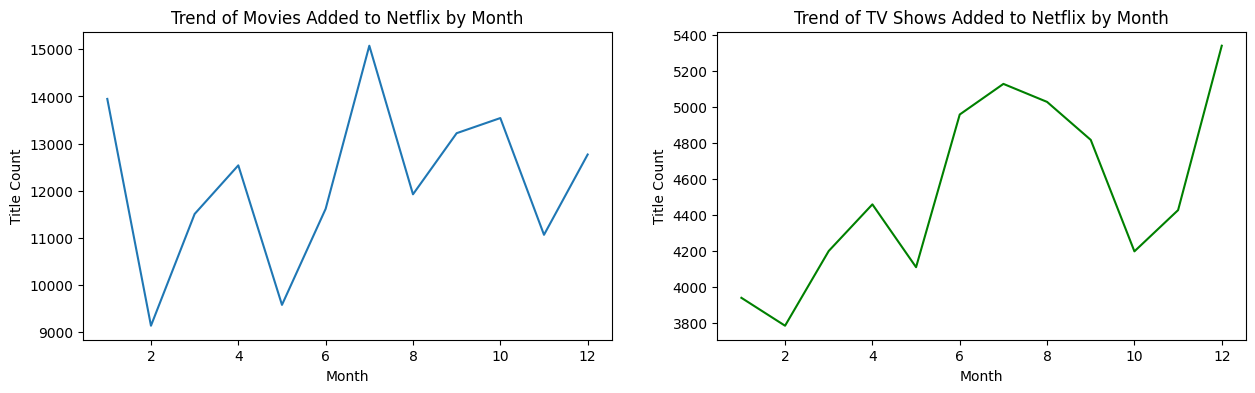

In [ ]:
#graphical analysis
movie_by_month = movie.groupby('month')['title'].count().reset_index()
tvshow_by_month = tv_show.groupby('month')['title'].count().reset_index()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(data = movie_by_month, y='title',x='month')
plt.title('Trend of Movies Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Title Count')
plt.subplot(1,2,2)
sns.lineplot(data = tvshow_by_month, y='title',x='month',color='green')
plt.title('Trend of TV Shows Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Title Count')
plt.show()

# **Insights:**

- Netflix tends to release both movies and TV shows in greater numbers during peak periods like June and December.
- The dips around February and mid-year suggest synchronized content management, likely reflecting consumer behavior or content production cycles.
- The mid-year sees some divergence in recovery trends, possibly indicating category-specific strategies to maintain user engagement.

# **Recommendations:**

**Strategic Content Releases:** Netflix could leverage these peaks by planning major content releases during these high-traffic months to maximize viewer engagement.

**Content Availability:** Ensure a steady stream of new titles throughout the year, especially during the months with lower additions, to maintain viewer interest and subscription renewals.

**Marketing Campaigns:** Align marketing campaigns with these peaks to boost visibility and attract new subscribers during high-content months.



---



# **Movies vs TV Shows Week on Week Analysis**

In [ ]:
#extract the week number for the year
movie.loc[:, 'week'] = movie['date_added'].dt.isocalendar().week
tv_show.loc[:, 'week'] = tv_show['date_added'].dt.isocalendar().week

In [ ]:
#non graphical analysis
def map_week_to_group(week_num): #converted the week into month wise number of week
    return (week_num - 1) % 4 + 1

movie['week'] = movie['week'].apply(map_week_to_group)
movie_by_week = movie.groupby('week')['title'].count().reset_index()
movie_by_week

,week,title
0,1,41139
1,2,34012
2,3,38070
3,4,32696


In [ ]:
tv_show['week'] = tv_show['week'].apply(map_week_to_group)
tv_show_by_week = tv_show.groupby('week')['title'].count().reset_index()

tv_show_by_week

,week,title
0,1,14070
1,2,12511
2,3,14495
3,4,13326


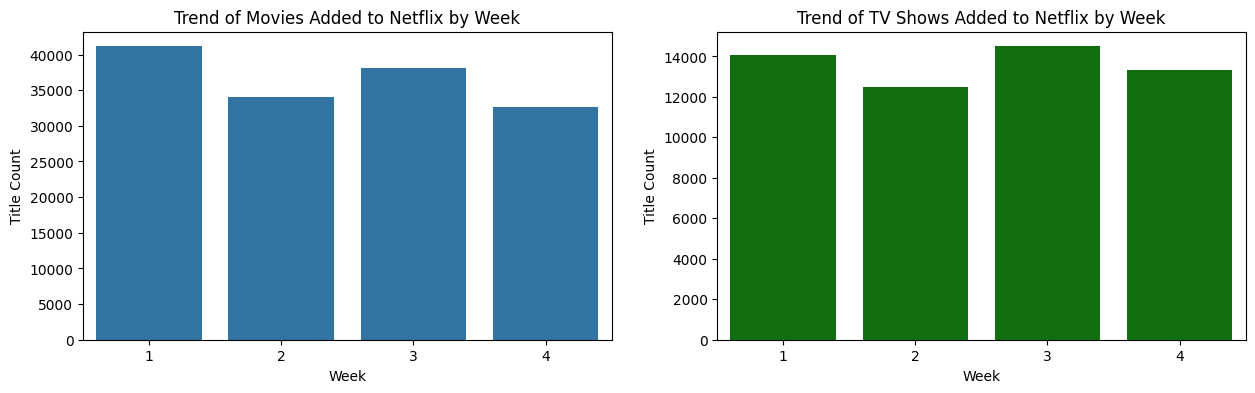

In [ ]:
#graphical analysis
def map_week_to_group(week_num):
    return (week_num - 1) % 4 + 1

movie['week'] = movie['week'].apply(map_week_to_group)
movie_by_week = movie.groupby('week')['title'].count().reset_index()

tv_show['week'] = tv_show['week'].apply(map_week_to_group)
tv_show_by_week = tv_show.groupby('week')['title'].count().reset_index()


plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(data = movie_by_week, y='title',x='week')
plt.title('Trend of Movies Added to Netflix by Week')
plt.xlabel('Week')
plt.ylabel('Title Count')
plt.subplot(1,2,2)
sns.barplot(data = tv_show_by_week, y='title',x='week',color='green')
plt.title('Trend of TV Shows Added to Netflix by Week')
plt.xlabel('Week')
plt.ylabel('Title Count')
plt.show()

# **Insights**:

Movies:

- The highest number of movies was added in Week 1, with around 40,000 titles.
- Week 2 saw a drop in the number of movies added, followed by a slight recovery in Week 3.
- Week 4 experienced a further decline, indicating a downward trend overall.

TV Shows:

- Week 1 and Week 3 had the highest number of TV shows added, both exceeding 13,000 titles.
- Week 2 saw a significant drop, with a modest recovery in Week 3.
- Week 4 followed a similar pattern to movies, showing a gradual decline.

# **Recommendations:**

While consistency is beneficial, introducing strategic spikes in content addition during peak viewing times (e.g., holidays, weekends, or special events) could boost viewer engagement and attract new subscribers.



---



# **What will be the better time to add content in Netflix?**

In [ ]:
#we find the best time to add content as per mode of difference
data_new['date_added_year'] = data_new['date_added'].dt.year
def func(x):
  return x['date_added_year'] - x['release_year']


data_new['diff'] = data_new.apply(func,axis=1)
data_new['diff'].mode()

,diff
0,0.0


# Insight & Recommendation:

Since the mode of year difference is 0, viewers prefer watching content in the same year as the content is released. Hence. it's best to add content on Netflix in the same year of release



---



# **New Movies/Shows Added Per Year for Top 4 Countries**


In [ ]:
#non graphical analysis

#extracted the information for top 4 countries
top3_countries = data_new.loc[(data_new['country']=='united states') |(data_new['country']=='india') | (data_new['country']=='united kingdom') | (data_new['country']=='japan')]

df = top3_countries.groupby(['country','date_added_year','type'])['title'].count().reset_index()

df.head(10)

,country,date_added_year,type,title
0,india,2016.0,Movie,420
1,india,2017.0,Movie,3173
2,india,2017.0,TV Show,178
3,india,2018.0,Movie,7362
4,india,2018.0,TV Show,162
5,india,2019.0,Movie,4393
6,india,2019.0,TV Show,242
7,india,2020.0,Movie,4006
8,india,2020.0,TV Show,369
9,india,2021.0,Movie,2057


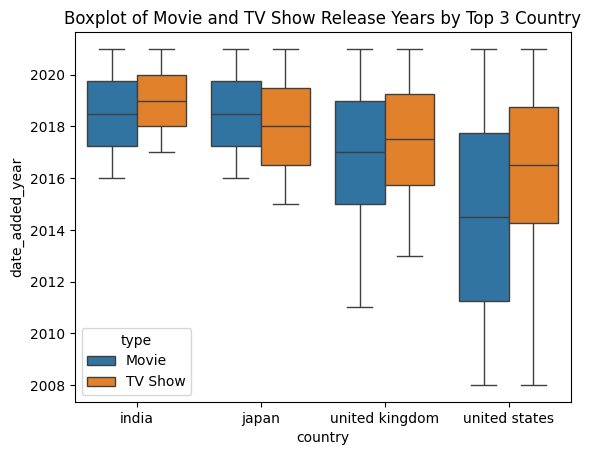

In [ ]:
#graphical analysis
top3_countries = data_new.loc[(data_new['country']=='united states') |(data_new['country']=='india') | (data_new['country']=='united kingdom') | (data_new['country']=='japan')]

df = top3_countries.groupby(['country','date_added_year','type'])['title'].count().reset_index()

sns.boxplot(data=df,x='country',y='date_added_year',hue='type')
plt.title('Boxplot of Movie and TV Show Release Years by Top 3 Country')
plt.show()



# **Insights:**

Detailed Observation:

**India:**
- Both movies and TV shows have a relatively high and consistent median (around 2018-2019).
- The IQR (box) for movies is slightly wider than for TV shows, suggesting there’s a bit more variability in the release years of movies compared to TV shows.
- The whiskers are relatively short, indicating that most of the content was released in recent years.

**Japan:**
- The release years for both movies and TV shows have a relatively narrow IQR,
suggesting a consistent release pattern.
- The medians for movies and TV shows are both around 2018, indicating recent releases dominate the data.
- The whiskers show a bit more spread for movies, indicating that movies in Japan include slightly older content compared to TV shows.

**United Kingdom:**
- The medians for movies and TV shows are more distinct compared to Japan and India, with TV shows having a higher median year of release (closer to 2019).
- The IQR for both movies and TV shows is wider compared to Japan and India, indicating a more varied range of release years.
- The whiskers extend more for TV shows than movies, suggesting a broader distribution of release years for TV shows in the UK.

**United States:**
- The U.S. shows the largest variability in release years for both movies and TV shows, as evidenced by the wider IQRs and longer whiskers.

- The median year for movies is lower (around 2016-2017), while TV shows have a slightly higher median (around 2018-2019).

- The whiskers extend down to earlier years, especially for movies, indicating that older movies are still present in the dataset.

General insights:

**Median Release Years:**
Movies: The median release year for movies is relatively consistent across all countries, hovering around 2014-2016.
TV Shows: The median release year for TV shows varies more, with the United States and the United Kingdom showing slightly newer median release years compared to India and Japan.

**Range of Release Years:**
Movies: The range of release years for movies is quite broad in all countries, indicating a steady production of movies over the years.
TV Shows: The range for TV shows is narrower, especially in Japan, suggesting a more recent focus on TV show production.

# **Recommendations:**

**Content Strategy:**
For India and Japan, we can consider increasing the production of newer TV shows to match the trends seen in the United States and the United Kingdom.
For the United States and the United Kingdom, maintain the current production levels but explore more diverse genres to cater to a broader audience.


**Marketing and Distribution:**
For Movies, since the release years are consistent, focus on marketing strategies that highlight the unique aspects of each movie to stand out in a crowded market.
For TV Shows, emphasize the freshness and relevance of newer TV shows, especially in markets like Japan where the range is narrower.

---



# **Do users prefer long form content or short form content?**

In [ ]:
#extracted the time and season in float format
movie['duration_min'] = movie['duration'].str.extract('(\d+)').astype(float)
tv_show['duration_min'] = tv_show['duration'].str.extract('(\d+)').astype(float)

In [ ]:
movie['duration_min'].head(5)

,duration_min
0,90.0
159,91.0
160,91.0
161,91.0
162,91.0


In [ ]:
tv_show['duration_min'].head(5)

,duration_min
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0


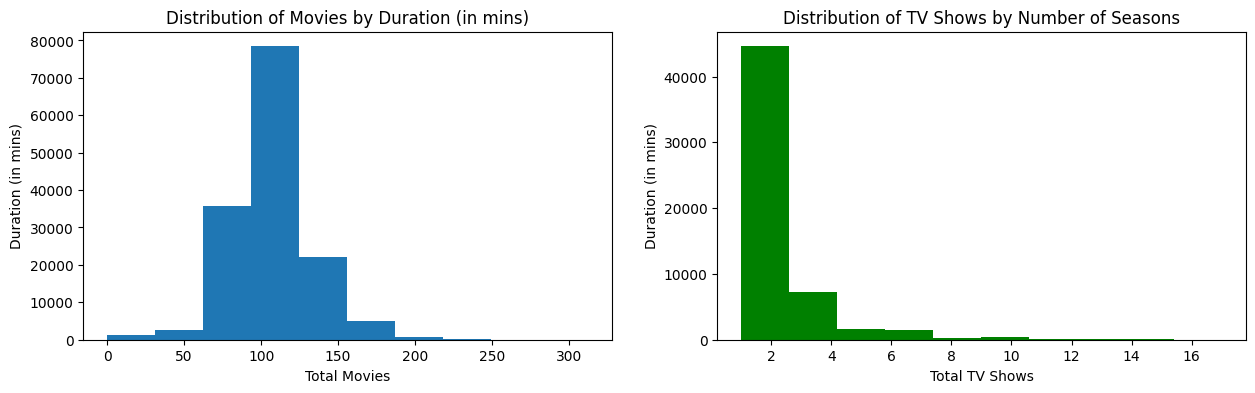

In [ ]:
#graphical analysis
movie['duration_min'] = movie['duration'].str.extract('(\d+)').astype(float)
tv_show['duration_min'] = tv_show['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(movie['duration_min'])
plt.xlabel('Total Movies')
plt.ylabel('Duration (in mins)')
plt.title('Distribution of Movies by Duration (in mins)')
plt.subplot(1,2,2)
plt.hist(tv_show['duration_min'],color='green')
plt.xlabel('Total TV Shows')
plt.ylabel('Duration (in mins)')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.show()



# **Insights:**

- **Peak Duration:** Most movies have a duration between 80 to 120 minutes. This suggests that filmmakers often aim for this range, likely due to audience preferences and industry standards.

- **Decline Beyond 120 Minutes:** There is a significant drop in the number of movies as the duration increases beyond 120 minutes. Longer movies are less common, possibly due to concerns about maintaining audience engagement.

- **High Drop-off After One Season:** The majority of TV shows have only one season, with a steep decline in the number of shows as the number of seasons increases. This indicates high competition and possibly low renewal rates.

- **Successful Shows:** Shows that manage to secure multiple seasons are relatively rare, suggesting that they have successfully captured and retained audience interest.

# **Recommendations:**

- **Target Duration:** Filmmakers should consider aiming for a duration within the 80 to 120-minute range to align with industry norms and audience expectations.

- **Strong First Season:** Focus on creating a strong and engaging first
season to capture the audience's interest and increase the chances of renewal.


---



# **Is there a correlation in Top Movie Genres across different countries?**

In [ ]:
#non graphical analysis
best_genre = movie[(movie['listed_in']=='dramas') | (movie['listed_in']=='international movies') | (movie['listed_in']=='comedies') | (movie['listed_in']=='documentaries')]
r = best_genre.groupby(['listed_in','country'])['title'].nunique().sort_values(ascending=False).reset_index()
r = r.pivot(index='country',columns='listed_in',values='title')
r = r.fillna(0) #handled null values
r.head(10)

listed_in,comedies,documentaries,dramas,international movies
country,,,,
,0.0,2.0,4.0,5.0
afghanistan,0.0,1.0,0.0,1.0
albania,0.0,0.0,1.0,1.0
algeria,0.0,0.0,3.0,3.0
angola,0.0,0.0,0.0,1.0
argentina,14.0,10.0,35.0,58.0
armenia,0.0,1.0,0.0,1.0
australia,15.0,15.0,38.0,30.0
austria,0.0,3.0,6.0,9.0


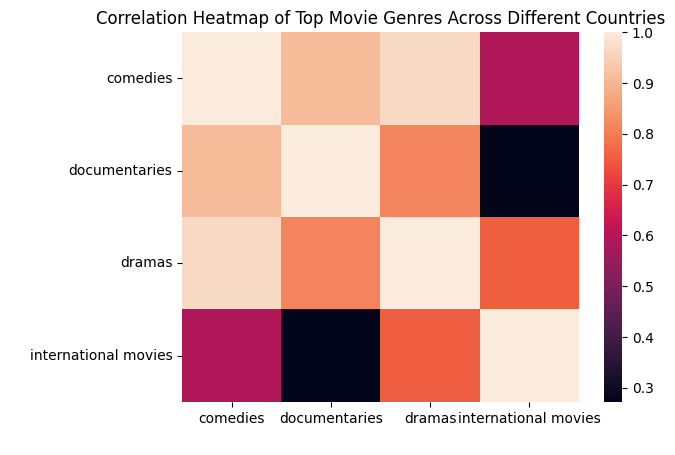

In [ ]:
#graphical analysis
best_genre = movie[(movie['listed_in']=='dramas') | (movie['listed_in']=='international movies') | (movie['listed_in']=='comedies') | (movie['listed_in']=='documentaries')]
r = best_genre.groupby(['listed_in','country'])['title'].nunique().sort_values(ascending=False).reset_index()
r = r.pivot(index='country',columns='listed_in',values='title')
r = r.fillna(0)


sns.heatmap(data=r.corr(numeric_only=True))
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Correlation Heatmap of Top Movie Genres Across Different Countries')
plt.show()

# **Insights:**

**Comedies and Documentaries:**

The correlation between these two genres is moderate, suggesting that countries or platforms producing comedies also tend to have a reasonable amount of documentaries.

**International Movies vs. Other Genres:**

It appears that international movies have a lower correlation with other genres like comedies and documentaries.

**Dramas and Documentaries:**

There's a higher correlation between dramas and documentaries, meaning countries with a strong focus on dramas are likely to also have significant production in documentaries.

**International Movies and Comedies:**

The very low correlation between international movies and comedies indicates that countries or platforms focusing on one may not be producing much of the other.

# **Recommendations:**

- Countries may benefit from specializing in certain genres based on their strengths. For example, if they produce many dramas, they should capitalize on this by creating more genre-specific subcategories (e.g., historical dramas, crime dramas).

- If certain countries have high correlations between two genres (e.g., dramas and documentaries), they should explore cross-genre opportunities or market them together to audience segments who enjoy both

- Countries with a low production in genres with high international appeal, such as comedies, should consider filling this gap. Increasing output in genres that are underproduced but popular globally may increase market reach.


---



---



# **Conclusion:**

1. **Content Preferences**

**Movies vs. TV Shows:**Netflix has more movies than TV shows. However, content production surged after 2005, peaking in 2018, with a slight decline after 2019 due to the COVID-19 pandemic.

**Genres:** Dramas dominate both movies and TV shows, followed by comedies and international movies. There is a growing demand for international content, especially non-English titles, catering to a global audience.

**Audience Preferences:** Most viewers prefer movies with durations between 80-120 minutes and TV shows with only one season. Long-form content (multiple seasons) is rare and tends to succeed if the first season is strong.

**Popular Ratings:** TV-MA (Mature) content is the most prevalent rating, indicating a significant focus on adult audiences. Netflix also has a strong catalog of R-rated content.


---



2. **Regional Insights**

**Top Countries:**The U.S., India, the U.K., and Japan are leading markets for both movies and TV shows. The U.S. leads in content consumption, with India being more focused on movies.

**Regional Genres**: International movies and TV dramas are popular across different regions, especially in India and Japan. Countries like the U.S. and U.K. consume both newer and older content, while countries like India and Japan focus more on recent releases.

**Local Talent:** Indian actors and directors are prominently featured, reflecting Netflix's significant investment in the Indian market. Global creators like Martin Scorsese also contribute to the platform's diverse offerings.


---



3. **Growth Opportunities**

**Expand Genres:** Increase investment in underrepresented genres like thrillers and romance, especially in regions that show a potential demand. Focus on international markets and niche genres like anime to appeal to global audiences.

**Regional Focus:** Netflix should continue to focus on local content production, especially in key markets like India, South Korea, and Japan. Further, expanding into regional content (e.g., Bollywood, K-dramas) will help capture untapped markets.

**Seasonality in Releases:** Content release patterns show peaks during June and December. Netflix should focus major releases during these high-traffic periods and maintain a steady stream of content during slower months.



---


4. **Marketing and Engagement**

**Regional Promotions:** Since different countries have unique preferences, Netflix should use tailored marketing strategies for various regions. For example, promoting Bollywood content in India or anime in Japan.

**Highlighting Talent:** Netflix can create collections or playlists featuring prolific directors and actors (e.g., Rajiv Chilaka, Anupam Kher) to boost engagement in regions with high demand for local stars.

In [ ]:
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')